# Tópicos Especiais em IA - Aula 02/09/2021

In [ ]:
%%capture
!pip install mlxtend --upgrade

In [2]:
import pandas as pd
import numpy as np

from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston, load_iris
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Funções Úteis

In [118]:
%matplotlib inline

def experimento(X, y):
    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =1)

    model_lr = LinearRegression()

    mse, bias, var = bias_variance_decomp(model_lr, X_train, y_train, X_test, y_test, loss = "mse", num_rounds = 200, random_seed=123)

    y_pred=model_lr.predict(X_test)

    print("Var", var)
    print("Bias", bias)

    print("MSE (train vs pred):", mse)
    print("MSE (test vs pred): ",metrics.mean_squared_error(y_test,y_pred))

    plt.title('Petal Length X Sepal Length')  
    plt.xlabel('Petal Length')  
    plt.ylabel('Sepal Length') 
    plt.scatter(X_train, y_train, color="blue")

    plt.plot(X_train, model_lr.predict(X_train), color="red")
    plt.show()

In [157]:
%matplotlib inline

def desenha_grafico(df, x1, x2):
    plt.title('{} X {}'.format(x1,x2))  
    plt.xlabel(x1)  
    plt.ylabel(x2) 
    plt.scatter(df[ [x1] ].to_numpy(), df[ [x2] ].to_numpy(), color="blue")
    plt.show()

## Dataset 1 - Boston

In [146]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

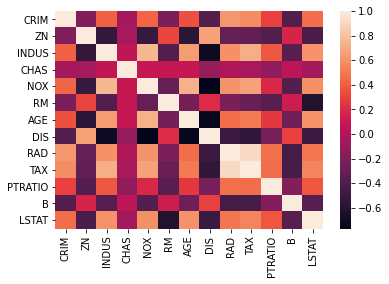

In [135]:
sns.heatmap(df.corr())

Escolhemos dois atributos com boa correlação entre si. Um será a feature (X) e o outro o alvo (y). Visualizando a relação entre eles:

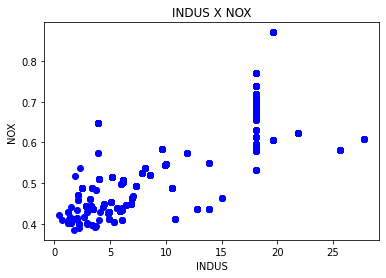

In [145]:
print_graf(df, "INDUS", "NOX")

Podemos ver indícios de uma relação linear.

In [136]:
X = df[ ['INDUS'] ].to_numpy()
y = df['NOX'].to_numpy()

Var 4.286626724162592e-05
Bias 0.005224814325528151
MSE (train vs pred): 0.005267680592769775
MSE (test vs pred):  0.005343790661854617


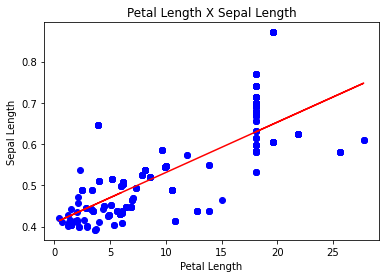

In [137]:
experimento(X,y)

## Dataset Iris

In [140]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

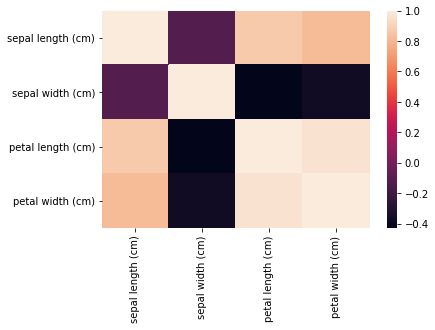

In [141]:
sns.heatmap(df.corr())

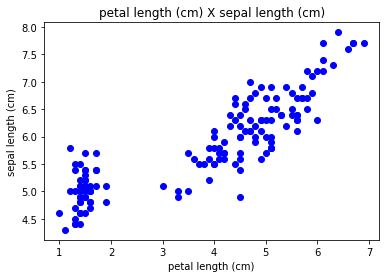

In [142]:
print_graf(df, "petal length (cm)", "sepal length (cm)")

In [120]:
X = df[ ["petal length (cm)"] ].to_numpy()
y = df["sepal length (cm)"].to_numpy()

Var 0.002575953748710596
Bias 0.2081922975344182
MSE (train vs pred): 0.21076825128312898
MSE (test vs pred):  0.2202749520294146


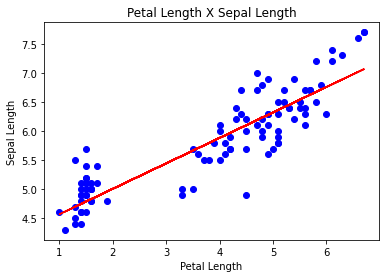

In [121]:
experimento(X,y)